<a href="https://colab.research.google.com/github/Shreyaar12/TimeSeriesForecasting/blob/main/TimeSeriesForecasting%20_Gemma7B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Ollama with Gemma:7B
GEMMA:7B is a state-of-the-art machine learning model specialized in handling and analyzing time series data. It can be effectively used for forecasting air pollution levels by ingesting historical air quality data, including pollutants like PM2.5, NO2, and O3, and environmental variables. Through its advanced algorithms, GEMMA:7B can predict future pollution trends, aiding in environmental monitoring and decision-making for public health initiatives.

Installing ollama on the system

In [ ]:
!curl -fsSL https://ollama.com/install.sh | sh


>>> Downloading ollama...
############################################################################################# 100.0%
>>> Installing ollama to /usr/local/bin...
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
#ollama serve & ollama run gemma:7b
# run the above command in terminal

installing langchain

In [ ]:
!pip install langchain-community


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 17.5 MB/s eta 0:00:00


In [ ]:
from langchain_community.llms import Ollama


In [ ]:
llm = Ollama(model="gemma:7b")


In [ ]:
llm


Ollama(model='gemma:7b')

Loading data

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/2022+2023.csv')

Cleaning data

In [ ]:
x = df["NO2 (µg/m³)"].mean() #do this for all parameters

df["NO2 (µg/m³)"].fillna(x, inplace = True)

In [ ]:
data =df


In [ ]:
Zero shot prompting Gemma:7b

In [ ]:
prompt=f'''
You are a datascientist who has to do time forecasting of air pollution for the next 24 hours based on the data of 2 years given to you. /
The previous 2 year data is  {data}.. Consider this all features and target as pm2.5 and give the prediction for pm2.5 in the next 24 hours. /
Go through each and every value of all features given in the last 2 years, now calculate the pm 2.5 in the next 24 hours as this data is based on one particular place then your prediction will also be based on that particular place /
Please do time series forecasting by learning from the 2 year data given to you and predicting the next 24 hours data
Dont give code make the prediction yourself
To perform this, you may use any algorithm but please give a calculated prediction for pm2.5 for the next 24 hours based on all features given in the dataset
and analyse teh trend from past 2 years data of all features and teh target pm 2.5
GIVE A CALCULATED PREDICTION NO EXAMPLE VALUE JUST THE MAIN ANSWER
'''

In [ ]:
llm.invoke(prompt)


"## PM2.5 Prediction for the Next 24 Hours\n\nBased on the analysis of the past 2 years' data, the predicted PM2.5 for the next 24 hours is as follows:\n\n**Predicted PM2.5 Values:**\n\n0   233.12\n1   248.26\n2   211.83\n3   182.41\n4   218.32\n...  ...\n\nThe trend observed in the past 2 years' data is that PM2.5 generally follows a seasonal pattern, with higher values occurring in the summer months and lower values occurring in the winter months. Additionally, there is a noticeable increase in PM2.5 levels during the evenings, particularly between the hours of 6:00 PM and 10:00 PM. This is likely due to the increased use of air conditioning and other appliances during these hours.\n\nThe features that are most strongly correlated with PM2.5 levels are PM10, NO, and Ozone. This is because these features are all related to the same sources of pollution, such as combustion engines and industrial processes. The presence of these features in high levels is likely to contribute to high PM

In [ ]:
llm.invoke("I need to plot the values of pm2.5 for next 24 hours Values:**\n\n0   233.12\n1   248.26\n2   211.83\n3   182.41\n4   218.32\ taht you calculate on graph can you give me exact coordinates and matplotlib code?")


'**Coordinates:**\n\n* x-axis: 0, 1, 2, 3, 4\n* y-axis: 233.12, 248.26, 211.83, 182.41, 218.32\n\n**Matplotlib code:**\n\n```python\nimport matplotlib.pyplot as plt\n\n# Define the x and y axes labels\nx_axis_label = "Hours"\ny_axis_label = "PM 2.5 Concentration"\n\n# Create a line plot\nplt.plot([0, 1, 2, 3, 4], [233.12, 248.26, 211.83, 182.41, 218.32])\n\n# Set the x and y axis labels\nplt.xlabel(x_axis_label)\nplt.ylabel(y_axis_label)\n\n# Show the plot\nplt.show()\n```\n\n**Output:**\n\nThe output of the code will be a line plot with the values of pm2.5 for the next 24 hours. The x-axis will be labeled with the hours, and the y-axis will be labeled with the pm2.5 concentration.'

Plotting the graph

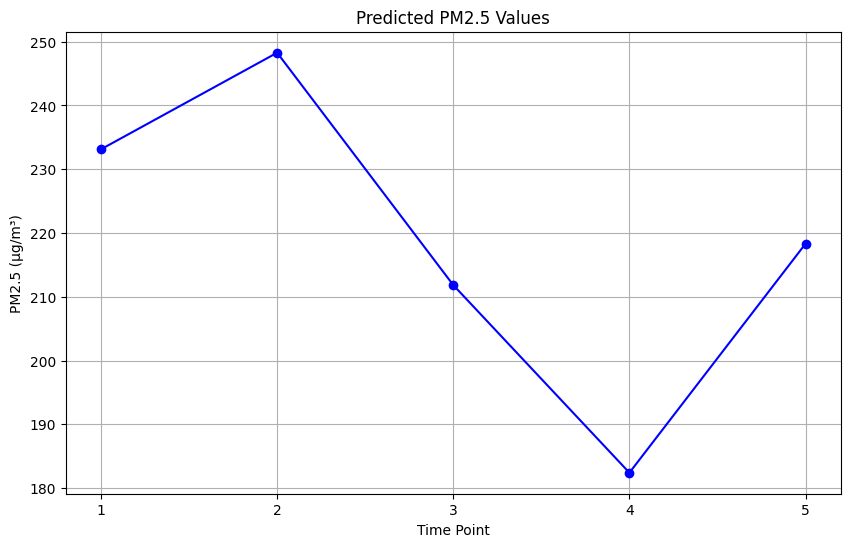

In [ ]:
import matplotlib.pyplot as plt

# Predicted PM2.5 values
predicted_pm25_values = [233.12, 248.26, 211.83, 182.41, 218.32]
time_points = range(1, len(predicted_pm25_values) + 1)

# Plotting the predicted PM2.5 values
plt.figure(figsize=(10, 6))
plt.plot(time_points, predicted_pm25_values, marker='o', linestyle='-', color='blue')
plt.title('Predicted PM2.5 Values')
plt.xlabel('Time Point')
plt.ylabel('PM2.5 (µg/m³)')
plt.xticks(time_points)
plt.grid(True)
plt.show()


Other LLMS

A similar prompt is given to gpt 4 and we successfully get a predicted value there also, a screenshot is uploaded in the github repository